<a href="https://colab.research.google.com/github/Thiagothims/ml_wine/blob/main/wine_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas utilizadas ao longo do desenvolvimento do proejto

In [142]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
from tqdm import tqdm
from sklearn.model_selection import train_test_split

Carregamento dos dados

In [143]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/winemag-data_first150k.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Avaliar o cabeçalho do dataset

In [144]:
print(df.head())

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

Visualizar o tamanho da matrix

In [145]:
print(df.shape)

(150930, 11)


Após analisar o tamanho do dataset, obter uma amostra é uma abordagem recomendada, considerando principalmente a capacidade computacional necessária para lidar com os processos necessários apra analise e predição dos resultados

In [146]:
df_sample = df.sample(frac=0.3, random_state=123)

print(df_sample.shape)

(45279, 11)


Camparação do tamanho da amostra

In [147]:
print('Total de registro: ' + str(df.shape[0]))
print('Amostragem de 30%: ' + str(df_sample.shape[0]))

Total de registro: 150930
Amostragem de 30%: 45279


Informações sobre os dados quanto seu tamanho em MB, tipo dos dados de cada coluna

In [149]:
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45279 entries, 90289 to 10552
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   45279 non-null  int64  
 1   country      45278 non-null  object 
 2   description  45279 non-null  object 
 3   designation  31669 non-null  object 
 4   points       45279 non-null  int64  
 5   price        41174 non-null  float64
 6   province     45278 non-null  object 
 7   region_1     37736 non-null  object 
 8   region_2     18320 non-null  object 
 9   variety      45279 non-null  object 
 10  winery       45279 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.1+ MB
None


Após avaliação de foco das analises, houve a decisão de retirar algumas colunas que neste momento atrapalhariam na questão conputacional e gerariam alguns ruidos desnecessários

In [150]:
df_sample = df_sample.drop(['Unnamed: 0', 'description', 'designation', 'region_1', 'region_2', 'winery'], axis=1)
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45279 entries, 90289 to 10552
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   45278 non-null  object 
 1   points    45279 non-null  int64  
 2   price     41174 non-null  float64
 3   province  45278 non-null  object 
 4   variety   45279 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB
None


Verificação de dados nulos na amostra

In [151]:
print(df_sample.isnull().sum())

country        1
points         0
price       4105
province       1
variety        0
dtype: int64


Exclusão dos dados nulos e comparação do restante da amostra

In [152]:
df_sample_cleaned = df_sample.dropna()
excluded = len(df_sample) - len(df_sample_cleaned)

print('Quantidade de dados excluidos: ' + str(excluded))
print('Quantidade de dados restantes: ' + str(len(df_sample_cleaned)) + '\n')

# Verificar se ainda exietem dados nulos
print(df_sample_cleaned.isnull().sum())

Quantidade de dados excluidos: 4106
Quantidade de dados restantes: 41173

country     0
points      0
price       0
province    0
variety     0
dtype: int64


Percentual atual da amostra

In [154]:
total = df.shape[0]
value_old = df_sample.shape[0]
value_new = df_sample_cleaned.shape[0]

print('Tamanho total do dataset: ' + str(total))
print('Tamanho da amostra: ' + str(value_old))
print('Tamanho da amostra após exclusão dos nulos: ' + str(value_new) + '\n')

percent_df_sample = (value_new * 100) / total
print('Percentual da amostra após exclusão dos nulos: {:.2f}%'.format(percent_df_sample))

Tamanho total do dataset: 150930
Tamanho da amostra: 45279
Tamanho da amostra após exclusão dos nulos: 41173

Percentual da amostra após exclusão dos nulos: 27.28%


Redefinindo a variável dos dados para ter mais clareza

In [155]:
df = df_sample_cleaned

In [156]:
print(df.head())

           country  points  price         province          variety
90289    Australia      93  110.0  South Australia            Syrah
96312  New Zealand      91   20.0      Marlborough  Sauvignon Blanc
25520        Spain      87   34.0   Northern Spain      Tempranillo
86206    Argentina      87   13.0            Other        Torrontés
96887           US      85   25.0       California       Chardonnay


In [157]:
print(df.shape)

(41173, 5)


In [158]:
print(df.describe())

             points         price
count  41173.000000  41173.000000
mean      87.796323     33.070216
std        3.214958     35.856560
min       80.000000      4.000000
25%       86.000000     16.000000
50%       88.000000     24.000000
75%       90.000000     40.000000
max      100.000000   1400.000000


Etapa de escalonamento e categorização

In [159]:
# Selecionar colunas relevantes para realizar escalonamento
numeric_columns = ['points', 'price']

scaler = StandardScaler()

df_copy = df.copy()

print("Dados não escalonados:")
print(df_copy[numeric_columns].head())

# Escalonar as colunas selecionadas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nDados escalonados:")
print(df[numeric_columns].head())

Dados não escalonados:
       points  price
90289      93  110.0
96312      91   20.0
25520      87   34.0
86206      87   13.0
96887      85   25.0

Dados escalonados:
         points     price
90289  1.618603  2.145513
96312  0.996503 -0.364518
25520 -0.247696  0.025931
86206 -0.247696 -0.559743
96887 -0.869796 -0.225072


In [160]:
print(df.head())

           country    points     price         province          variety
90289    Australia  1.618603  2.145513  South Australia            Syrah
96312  New Zealand  0.996503 -0.364518      Marlborough  Sauvignon Blanc
25520        Spain -0.247696  0.025931   Northern Spain      Tempranillo
86206    Argentina -0.247696 -0.559743            Other        Torrontés
96887           US -0.869796 -0.225072       California       Chardonnay


In [162]:
# Categorização Ordinal
string_columns = ['country', 'province', 'variety']

ordinal_encoder = OrdinalEncoder()
df_encoded = df.copy()

df_encoded[string_columns] = ordinal_encoder.fit_transform(df[string_columns])

df = df_encoded

print(df.head())

       country    points     price  province  variety
90289      2.0  1.618603  2.145513     289.0    386.0
96312     29.0  0.996503 -0.364518     173.0    351.0
25520     36.0 -0.247696  0.025931     220.0    403.0
86206      1.0 -0.247696 -0.559743     227.0    424.0
96887     38.0 -0.869796 -0.225072      48.0     88.0


Visualização do método do "cotovelo"

12345678910

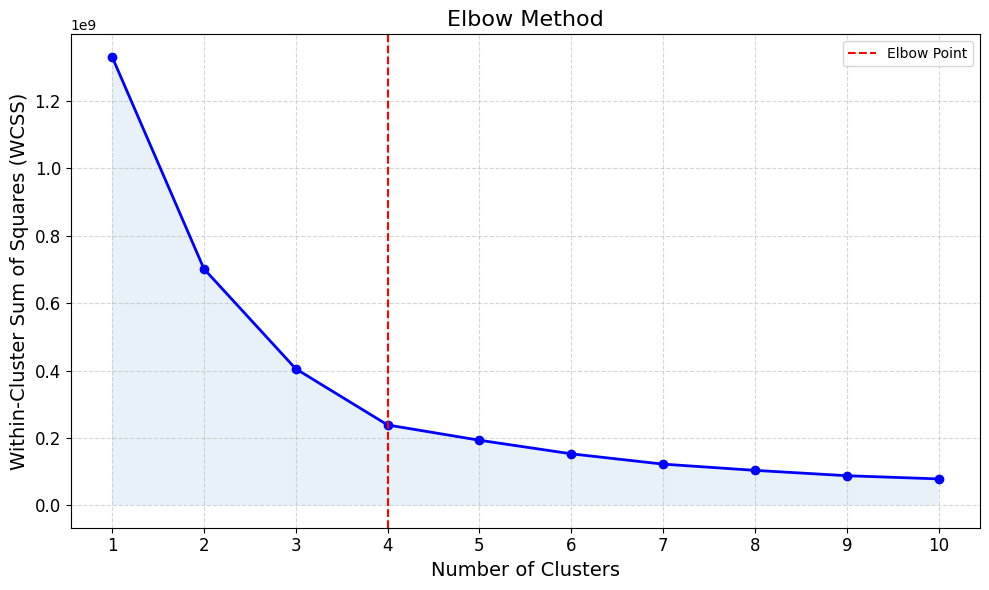

In [178]:
wcss = []

k_range = range(1, 11)

for k in k_range:
    print(k,end="")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', color='blue', linestyle='-', linewidth=2)
plt.axvline(x=4, color='red', linestyle='--', label='Elbow Point')
plt.fill_between(k_range, wcss, alpha=0.1)

plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)
plt.xticks(k_range, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

In [179]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

Treinamento e Teste

In [ ]:
columns_clustering = ['country', 'price', 'points', 'province', 'variety' ]

X = data_encoded

X_ = X[columns_clustering]

In [ ]:
print(X.head())

In [ ]:
# Visualizar a distribuição das variáveis numéricas
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Identificar outliers usando boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(data_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Verificar correlações entre as variáveis numéricas
corr_matrix = data_cleaned[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Aplicação de PCA

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA aos dados escalonados
pca = PCA()
pca_transformed = pca.fit_transform(data_scaled[numeric_columns])

In [ ]:
# Visualizar a variância explicada por cada componente principal
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [ ]:
# Selecionar o número de componentes principais com base na variância explicada desejada
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1

In [ ]:
# Aplicar PCA com o número selecionado de componentes
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled[numeric_columns])

In [ ]:
# Adicionar as componentes principais ao dataframe
pca_columns = [f'PC{i+1}' for i in range(n_components)]
data_encoded[pca_columns] = data_pca

Experimentar Diferentes Métricas de Distância

In [ ]:
from sklearn.metrics import silhouette_score

# Definir as métricas de distância a serem testadas
# distance_metrics = ['euclidean']
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

In [ ]:
# Inicializar um dicionário para armazenar os resultados
silhouette_scores = {}

In [ ]:
# Testar diferentes métricas de distância
for metric in distance_metrics:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_encoded, labels, metric=metric)
    silhouette_scores[metric] = silhouette_avg

In [ ]:
# Visualizar os resultados
plt.figure(figsize=(8, 6))
sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()))
plt.xlabel('Distance Metric')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Distance Metrics')
plt.show()